# Como escolher o melhor modelo para resolver o meu problema de classificação || Cross-Validation
![Machine learning](imagens/mammogram.png)

## Procedimentos de avaliação de modelos preditivos

- **Objetivo:** Comparar com outros modelos e escolher qual modelo e parâmetros são melhores para resolver SEU problema.

**Ideia inicial:** treinar e testar o modelo com o mesmo conjunto de dados

- Maximizam a acurácia de treinamento, recompensando modelo supercomplexos que ficam superajustados aos dados de treino.


**Ideia alternativa:** dividir o conjunto de dados entre conjunto de treino e conjunto de teste

- Divide o conjunto de dados em duas partes, logo o modelo pode ser treinado e testado com **dados diferentes**
- Acurácia de teste é uma melhor estimativa de performance do que acurácia de treinamento
- Porém, essa estimativa possui uma **alta variância**, já que dependendo das amostras que estiverem no conjunto de teste, a acurácia de teste pode mudar significamente.

## Dataset Câncer de Mama:
* 569 instâncias, no qual cada instância representa um tecido mamário;
* 30 atributos, que são representados pelas colunas 2 até a coluna 32;
* As classes das instâncias correspondem se o tumor é maligno ou benigno, representadas pela segunda coluna, a coluna diagnosis;
* Trata-se de um problema de classificação.

In [30]:
# Abrindo nosso dataset 
import pandas as pd
cancer = pd.read_csv("breast-cancer-wisconsin-data/data.csv", index_col=0)

# Substituir as variáveis categóricas por núméricas
diag = {'M':0, 'B':1}
cancer.diagnosis = [diag[item] for item in cancer.diagnosis]

# Separar os objetos dos atributos e das classes
X = cancer[cancer.columns[1:31]]
y = cancer.diagnosis

In [31]:
# Dividindo X e y em conjunto de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=3)

In [32]:
# Checando a acurácia de classificação do KNN (K=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


### Passo a passo do K-fold cross-validation

1. Divida o conjunto de dados e K partes iguais (folds).
2. Use 1 parte como conjunto de teste e a união das outras partes como conjunto de treino. 
3. Calcule a **acurácia de teste**.
4. Repita os passos 2 e 3 K vezes, utilizando uma parte diferente como conjunto de teste, cada vez.
5. Utilize a acurácia de teste média como uma estimativa de performance do seu modelo. 

Diagrama para 5-fold cross-validation:

![Machine learning](imagens/07_cross_validation_diagram.png)

In [9]:
# Simulando a divisão de um conjunto de dados com 25 instâncias em 5 partes
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# Mostrando o conteúdo de cada conjunto de treino e teste
print('{} {:^61} {}'.format('Iteração', 'Instâncias do conjunto de treino', 'Instâncias do conjunto de teste'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteração               Instâncias do conjunto de treino                Instâncias do conjunto de teste
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- O Conjunto de dados possui **25 amostras**
- 5-fold cross-validation, então temos **5 iterações**
- Para cada iteração, todas amostras estão ou no conjunto de treino ou no conjunto de teste, mas nunca nos dois ao mesmo tempo.
- Cada amostra está no conjunto de teste somente uma vez.

### Comparando corss-validation com train/test split 

Vantagens de **cross-validation:**

- Melhor estimativa de performance do modelo
- Uso mais eficiente dos dados (cada amostra é utilizada tanto no conjunto de treino como de teste)

Vantagens de **train/test split:**

- Roda K vezes mais rápida que K-fold corss-validation
- Mais fácil de examinar os resultados 

### Exemplo de utilização de cross-validation: ajustando parâmetros

In [29]:
# Importando a função cross_val_score
from sklearn.model_selection import cross_val_score

In [35]:
# 10-fold cross-validation com K=5 para KNN (O parâmetro n_neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.9137931  0.87931034 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92857143 0.91071429 0.96428571]


In [36]:
# Utilizando a média das acurácias como estimativa da acurácia para novas amostras
print(scores.mean())

0.9298429262812202


In [38]:
# Procurando o melhor valor de K para KNN
k_range = list(range(1,31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.9158067582749977, 0.9120506006395299, 0.9263330740644717, 0.9209143548526489, 0.9298429262812202, 0.9262714977097917, 0.9280572119955061, 0.9298115979604182, 0.926424898453029, 0.9316891366346901, 0.9299649987036556, 0.9316891366346901, 0.931719384668568, 0.9299034223489759, 0.9299649987036556, 0.9299649987036556, 0.9299963270244577, 0.9299649987036556, 0.9317507129893698, 0.9299649987036556, 0.9299963270244577, 0.9299963270244577, 0.9283035174142251, 0.9265178031285108, 0.9283035174142251, 0.9283035174142251, 0.9247947454844005, 0.926549131449313, 0.9230090311986864, 0.9230090311986864]


Text(0, 0.5, 'Acurácia')

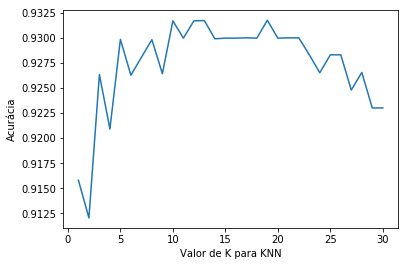

In [39]:
# Plotando o valor de K para KNN (eixo-x) versus a acurácia de cross-validation (eixo-y)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia')

### Exemplo de utilização de cross-validation: seleção de modelo

**Objetivo**: Comparar o melhor modelo de KNN com o logistic regression 

In [40]:
# 10-fold cross-validation com o melhor modelo de KNN
knn = KNeighborsClassifier(n_neighbors=10)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9316891366346901


In [41]:
# 10-fold cross-validation com Regressão Logística
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9508998790078644


### Exemplo de utilização de cross-validation: seleção de atributos

**Objetivo**: Decidir se o atributo region deve ser incluído no modelo 

In [42]:
#importando as bibliotecas 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [44]:
# Lendo o conjunto de dados insurance
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Substituindo as palavras por números no conjunto de dados

In [45]:
#(smoker): no -> 0 / yes -> 1
data.smoker = np.where(data.smoker=='no', 0, data.smoker)
data.smoker = np.where(data.smoker=='yes', 1, data.smoker)

#(sex): female -> 0 / male -> 1
data.sex = np.where(data.sex=='female', 0, data.sex)
data.sex = np.where(data.sex=='male', 1, data.sex)

#(region): southwest -> 0 / northwest -> 1 / southeast -> 2 / northeast -> 3
data.region = np.where(data.region=='southwest', 0, data.region)
data.region = np.where(data.region=='northwest', 1, data.region)
data.region = np.where(data.region=='southeast', 2, data.region)
data.region = np.where(data.region=='northeast', 3, data.region)

In [46]:
# Criando uma lista com o nome dos 6 atributos
feature_cols = ['age','sex','bmi','children','smoker','region']

# Utilizando a lista para selecionar um subconjunto de dados do DataFrame
X = data[feature_cols]

# Selecionando a coluna Sales como vetor de resposta (y)
y = data.charges

In [49]:
# 10-fold cross-validation com os 6 atributos
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, 
                         scoring='neg_mean_squared_error')
print(scores)

[-36212143.05482436 -38418325.5943571  -36828387.26965415
 -39071960.8210151  -39025430.28511591 -26560883.76360489
 -30995874.73703483 -48318133.47703265 -33595325.37573792
 -41502467.36156968]


In [50]:
# Consertando o sinal dos resultados de MSE
mse_scores = -scores
print(mse_scores)

[36212143.05482436 38418325.5943571  36828387.26965415 39071960.8210151
 39025430.28511591 26560883.76360489 30995874.73703483 48318133.47703265
 33595325.37573792 41502467.36156968]


In [51]:
# Convertendo MSE para RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[6017.65261999 6198.2518176  6068.63965561 6250.75681986 6247.0337189
 5153.72523168 5567.39389095 6951.12461959 5796.1474598  6442.24086491]


In [52]:
# Calculando a média de RMSE
print(rmse_scores.mean())

6069.296669888763


In [55]:
# 10-fold cross-validation com 5 atributos (excluindo region)
feature_cols = ['age','sex','bmi','children','smoker']
X = data[feature_cols]
y = data.charges
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, 
                                scoring='neg_mean_squared_error').mean()))

6086.412687883666


### Sugestões de melhorias do método de avaliação cross-validation

**Repetição do processo de cross-validation**

- Repita cross-validation várias vezes (com diferentes divisões aleatórias dos dados)

**Criando um conjunto de retenção**

- Retenha uma parte dos dados **antes** de iniciar o processo de construção do modelo
- Ache o melhor modelo usando validação cruzada nos dados restantes e teste-o **usando o conjunto de retenção**

## Comentários ou Dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Website: http://viniciusgalvaoia.com.br

In [21]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()